
# 📊 Classification avec KNN - Prédiction de Maladies Cardiaques

Ce notebook présente un projet de classification utilisant l'algorithme **K-Nearest Neighbors (KNN)** pour prédire la présence ou non de maladies cardiaques à partir de données médicales.


## 📦 Importation des bibliothèques nécessaires

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## 📁 Chargement du jeu de données

In [100]:
df = pd.read_csv("heart_disease_1.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB



## 🧼 Prétraitement des données

Nous traitons ici :
- les valeurs manquantes
- la variable cible `num` en la rendant binaire (`0` = pas de maladie, `1` = présence de maladie)


In [102]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [103]:
df = df.fillna(df.mean(numeric_only=True))
# (Re)afficher pour confirmation
print("\naprès suppression :",df.isnull().sum())


après suppression : age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [104]:
df.duplicated().sum()

0

### 🔁 Suppression des doublons

In [ ]:
df = df.drop_duplicates()


## 🎯 Sélection des variables pertinentes

On choisit certaines variables comme `age`, `thalach` (fréquence cardiaque max), etc. pour entraîner notre modèle.


In [136]:
X = df[['age', 'cp', 'thalach', 'slope', 'ca', 'thal', 'chol', 'restecg']]
y = df['num']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ✂️ Séparation des données & ⚖️ Normalisation

In [143]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=8)

## 🤖 Entraînement du modèle KNN

In [144]:
y_pred = knn.predict(X_test_scaled)
y_pred


array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

## 🧪 Prédiction & Évaluation du modèle

In [145]:
acc = accuracy_score(y_test, y_pred)
print(" Précision du modèle KNN :", acc)

 Précision du modèle KNN : 0.8688524590163934


KeyboardInterrupt: 

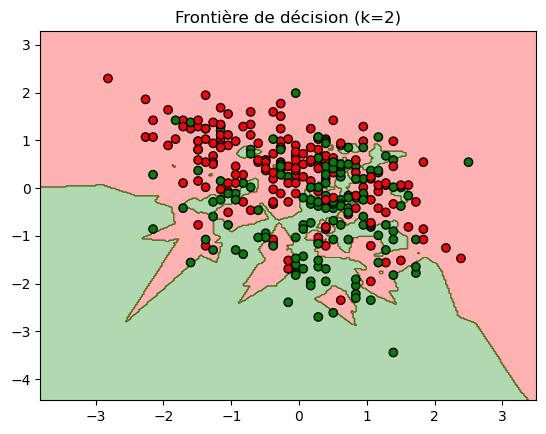

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Charger les données
df = pd.read_csv("heart_disease_1.csv")
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Sélection de deux colonnes pour visualiser
X_vis = df[['age', 'thalach']].values
y_vis = df['num'].values

# Normalisation
scaler = StandardScaler()
X_vis = scaler.fit_transform(X_vis)

# Définir les limites du graphe
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Plot et animation
fig, ax = plt.subplots()
knn = KNeighborsClassifier()

def update(k):
    ax.clear()
    knn.set_params(n_neighbors=k)
    knn.fit(X_vis, y_vis)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'green']))
    ax.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=ListedColormap(['red', 'green']), edgecolor='k')
    ax.set_title(f'Frontière de décision (k={k})')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

ani = FuncAnimation(fig, update, frames=range(1, 21), interval=500)

from IPython.display import HTML
HTML(ani.to_jshtml())
plt.show()
